In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, make_blobs, load_breast_cancer

In [5]:
def rbf(x, c, s):
    return np.exp(-1 / (2 * s**2) * (x-c)**2)

In [6]:
def kmeans(X, k):
    """Performs k-means clustering for 1D input
    
    Arguments:
        X {ndarray} -- A Mx1 array of inputs
        k {int} -- Number of clusters
    
    Returns:
        ndarray -- A kx1 array of final cluster centers
    """
    # randomly select initial clusters from input data
    clusters = np.random.choice(np.squeeze(X), size=k)
    prevClusters = clusters.copy()
    stds = np.zeros(k)
    converged = False
    while not converged:
        """
        compute distances for each cluster center to each point 
        where (distances[i, j] represents the distance between the ith point and jth cluster)
        """
        distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
        # find the cluster that's closest to each point
        closestCluster = np.argmin(distances, axis=1)
        # update clusters by taking the mean of all of the points assigned to that cluster
        for i in range(k):
            pointsForCluster = X[closestCluster == i]
            if len(pointsForCluster) > 0:
                clusters[i] = np.mean(pointsForCluster, axis=0)
        # converge if clusters haven't moved
        converged = np.linalg.norm(clusters - prevClusters) < 1e-6
        prevClusters = clusters.copy()
    distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
    closestCluster = np.argmin(distances, axis=1)
    clustersWithNoPoints = []
    for i in range(k):
        pointsForCluster = X[closestCluster == i]
        if len(pointsForCluster) < 2:
            # keep track of clusters with no points or 1 point
            clustersWithNoPoints.append(i)
            continue
        else:
            stds[i] = np.std(X[closestCluster == i])
    # if there are clusters with 0 or 1 points, take the mean std of the other clusters
    if len(clustersWithNoPoints) > 0:
        pointsToAverage = []
        for i in range(k):
            if i not in clustersWithNoPoints:
                pointsToAverage.append(X[closestCluster == i])
        pointsToAverage = np.concatenate(pointsToAverage).ravel()
        stds[clustersWithNoPoints] = np.mean(np.std(pointsToAverage))
    return clusters, stds

In [32]:
class RBFNet(object):
    """Implementation of a Radial Basis Function Network"""
    def __init__(self, k=2, lr=0.01, epochs=100, rbf=rbf, inferStds=True):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf
        self.inferStds = inferStds
        self.w = np.random.randn(k)
        self.b = np.random.randn(1)
    
    def fit(self, X, y):
        if self.inferStds:
            # compute stds from data
            self.centers, self.stds = kmeans(X, self.k)
        else:
            # use a fixed std 
            self.centers, _ = kmeans(X, self.k)
            dMax = max([np.abs(c1 - c2) for c1 in self.centers for c2 in self.centers])
            self.stds = np.repeat(dMax / np.sqrt(2*self.k), self.k)
        # training
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                # forward pass
                a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
                F = a.T.dot(self.w) + self.b
                loss = (y[i] - F).flatten() ** 2
                print('Loss: {0:.2f}'.format(loss[0]))
                # backward pass
                error = -(y[i] - F).flatten()
                # online update
                self.w = self.w - self.lr * a * error
                self.b = self.b - self.lr * error
                
    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
            F = a.T.dot(self.w) + self.b
            y_pred.append(F)
        return np.array(y_pred)

In [40]:
# sample inputs and add noise
NUM_SAMPLES = 100
X = np.random.uniform(0., 1., NUM_SAMPLES)
X = np.sort(X, axis=0)
noise = np.random.uniform(-0.1, 0.1, NUM_SAMPLES)
y = np.sin(2 * np.pi * X)  + noise

In [41]:
rbfnet = RBFNet(lr=1e-2, k=2)
rbfnet.fit(X, y)
y_pred = rbfnet.predict(X)

Loss: 0.82
Loss: 0.78
Loss: 0.91
Loss: 1.06
Loss: 1.16
Loss: 1.55
Loss: 1.40
Loss: 1.54
Loss: 2.05
Loss: 1.86
Loss: 2.28
Loss: 2.15
Loss: 2.07
Loss: 2.33
Loss: 2.79
Loss: 2.49
Loss: 2.34
Loss: 2.84
Loss: 2.51
Loss: 2.77
Loss: 2.89
Loss: 2.95
Loss: 3.35
Loss: 3.30
Loss: 2.99
Loss: 3.54
Loss: 3.20
Loss: 3.04
Loss: 2.48
Loss: 2.61
Loss: 2.34
Loss: 1.84
Loss: 2.08
Loss: 1.69
Loss: 1.65
Loss: 1.26
Loss: 1.14
Loss: 1.21
Loss: 0.95
Loss: 0.73
Loss: 0.51
Loss: 0.62
Loss: 0.40
Loss: 0.40
Loss: 0.33
Loss: 0.39
Loss: 0.20
Loss: 0.35
Loss: 0.23
Loss: 0.28
Loss: 0.11
Loss: 0.12
Loss: 0.08
Loss: 0.03
Loss: 0.11
Loss: 0.02
Loss: 0.01
Loss: 0.20
Loss: 0.44
Loss: 0.44
Loss: 0.40
Loss: 1.48
Loss: 1.30
Loss: 1.30
Loss: 1.84
Loss: 2.63
Loss: 4.66
Loss: 5.70
Loss: 6.05
Loss: 5.32
Loss: 6.04
Loss: 6.54
Loss: 6.75
Loss: 6.22
Loss: 6.05
Loss: 6.27
Loss: 6.08
Loss: 5.33
Loss: 5.43
Loss: 4.86
Loss: 4.55
Loss: 3.78
Loss: 2.48
Loss: 2.48
Loss: 2.20
Loss: 1.52
Loss: 1.71
Loss: 0.82
Loss: 0.89
Loss: 0.80
Loss: 0.93

In [42]:
y_pred

array([[ 0.08652383],
       [ 0.08956649],
       [ 0.09397586],
       [ 0.11781993],
       [ 0.19940558],
       [ 0.20355374],
       [ 0.21571339],
       [ 0.22255135],
       [ 0.32132331],
       [ 0.36239635],
       [ 0.37573361],
       [ 0.37833353],
       [ 0.45082548],
       [ 0.5216997 ],
       [ 0.53659048],
       [ 0.54542247],
       [ 0.55931552],
       [ 0.61037354],
       [ 0.61480204],
       [ 0.62215355],
       [ 0.74822153],
       [ 0.77873737],
       [ 0.7860607 ],
       [ 0.85920464],
       [ 0.89149414],
       [ 0.90832432],
       [ 0.9362319 ],
       [ 0.93788601],
       [ 0.91845415],
       [ 0.91600777],
       [ 0.89049812],
       [ 0.84797935],
       [ 0.83731712],
       [ 0.79173275],
       [ 0.78918488],
       [ 0.74332756],
       [ 0.73911041],
       [ 0.70869392],
       [ 0.66275821],
       [ 0.56819464],
       [ 0.53057756],
       [ 0.51329319],
       [ 0.50155172],
       [ 0.47611735],
       [ 0.4493913 ],
       [ 0

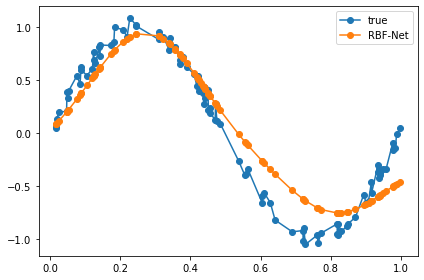

In [43]:
plt.plot(X, y, '-o', label='true')
plt.plot(X, y_pred, '-o', label='RBF-Net')
plt.legend()
plt.tight_layout()
plt.show()